# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between mouse weight and the average tumor volume for Capomulin, which means the heavier a mouse weight, the larger the average tumor volume.
- Capomulin and Ramicane has a better treatment result on reducing tumor volume comparing to Infubinol and Ceftamin
- Capomulin's treatment on mouse l509 shows that Capomulin's treatment helps to reduce tumor volume.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combine=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
number_of_mice=mouse_study_combine['Mouse ID'].nunique()
number_of_mice


249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_combine[mouse_study_combine.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df = mouse_study_combine.set_index('Mouse ID')
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_df1 = clean_df.reset_index()
number_of_mice1=clean_df1['Mouse ID'].nunique()
number_of_mice1

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume = clean_df1.groupby(['Drug Regimen'])
tumor_volume_df=tumor_volume['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

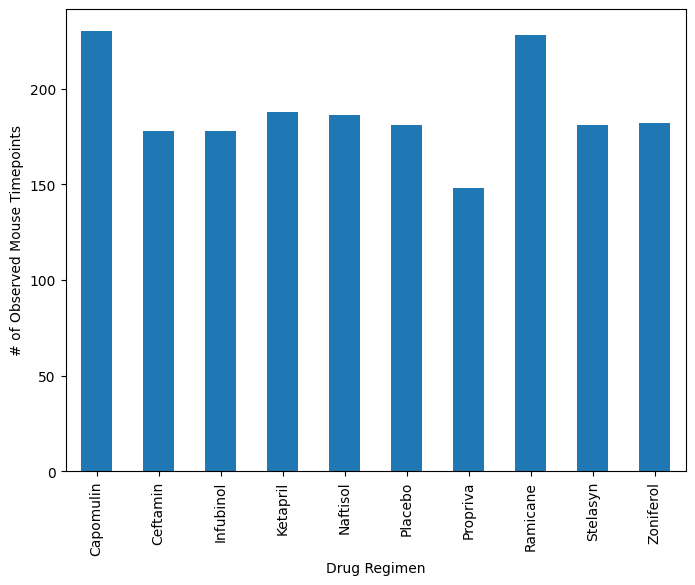

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df1.groupby(['Drug Regimen']).count()['Mouse ID']
drug_counts.plot(kind='bar', figsize=(8,6))
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

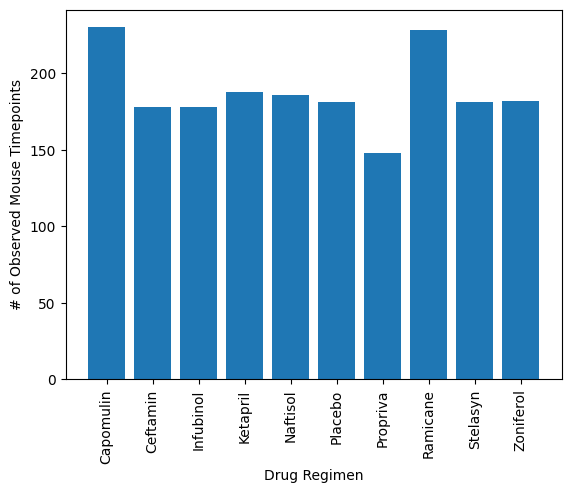

<Figure size 800x600 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.figure(figsize=(8,6))
plt.show()

Text(0, 0.5, 'Sex')

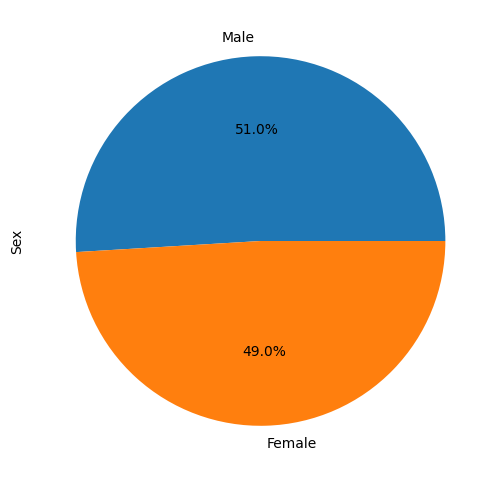

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts=clean_df1['Sex'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=360)
plt.ylabel('Sex')

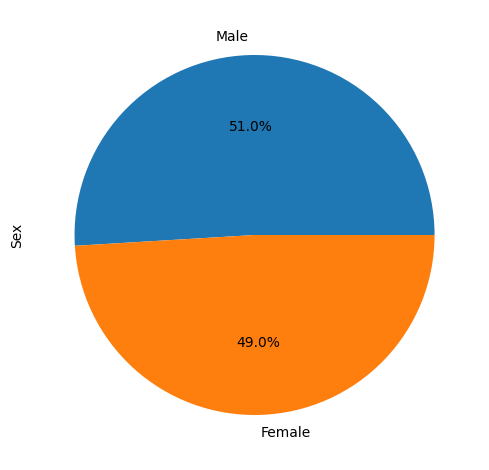

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=('Male', 'Female'), autopct='%1.1f%%', startangle=360)
plt.ylabel('Sex') 
plt.tight_layout() 
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse_timepoint_df=clean_df1.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_merge=pd.merge(clean_df1, last_mouse_timepoint_df, on="Mouse ID")
data_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_info = data_merge.loc[data_merge['Drug Regimen'] == drug]
    final_tumor = drug_info.loc[drug_info['Timepoint_x'] == drug_info['Timepoint_y']]['Tumor Volume (mm3)']
    tumor_vol.append(final_tumor)

    # Determine outliers using upper and lower bounds
    lower, upper = np.percentile(final_tumor, [25,75])
    iqr = upper-lower
    lower_bound = lower - 1.5*iqr
    upper_bound = upper + 1.5*iqr
    outliers=[tumor_size for tumor_size in final_tumor if tumor_size > upper_bound or tumor_size < lower_bound]
    print(f"{drug} IQR: {iqr}")
    print(f"{drug} Outliers: {outliers}")


Capomulin IQR: 7.781863460000004
Capomulin Outliers: []
Ramicane IQR: 9.098536719999998
Ramicane Outliers: []
Infubinol IQR: 11.477135160000003
Infubinol Outliers: [36.3213458]
Ceftamin IQR: 15.577752179999997
Ceftamin Outliers: []


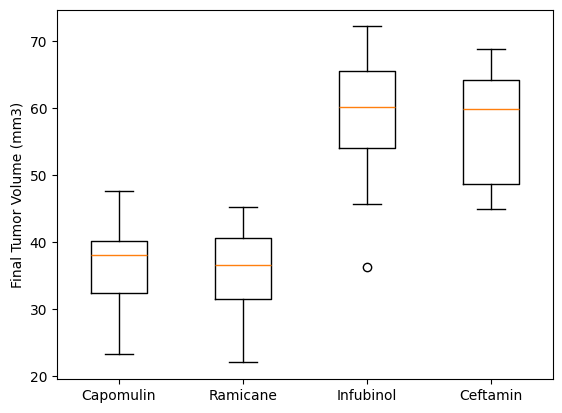

In [31]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_merge1=pd.merge(last_mouse_timepoint_df, clean_df1, on=["Mouse ID","Timepoint"])

Capomulin = []
Ramicane= []
Infubinol = []
Ceftamin = []
tumor_volume = [Capomulin, Ramicane, Infubinol, Ceftamin]



for x in range(len(data_merge1)-1):
    drug_loc=data_merge1.loc[x, "Drug Regimen"]
    tumor_volume_loc=(data_merge1.loc[x, "Tumor Volume (mm3)"])
    
    if drug_loc == "Capomulin":
        Capomulin.append(tumor_volume_loc)

    elif drug_loc == "Infubinol":
        Infubinol.append(tumor_volume_loc)

    elif drug_loc == "Ramicane":
        Ramicane.append(tumor_volume_loc)
    
    elif drug_loc == "Ceftamin":
        Ceftamin.append(tumor_volume_loc)


fig, ax = plt.subplots()
ax.boxplot(tumor_volume)
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(treatments)
plt.show()



## Line and Scatter Plots

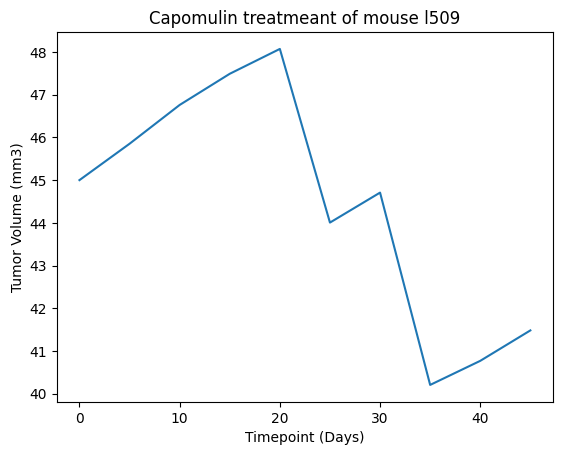

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df1.loc[clean_df1["Mouse ID"] == "l509"]
plt.plot(line_df["Timepoint"],line_df["Tumor Volume (mm3)"])
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

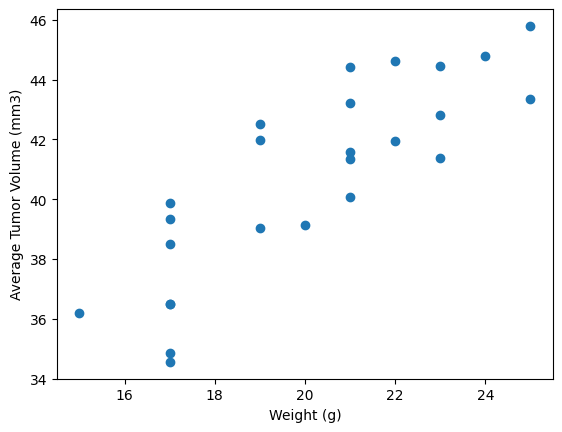

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_df1.loc[clean_df1["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
mouse = scatter_df["Weight (g)"].unique()
avg_tumor = scatter_df["Tumor Volume (mm3)"].mean()
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.scatter(mouse, avg_tumor)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


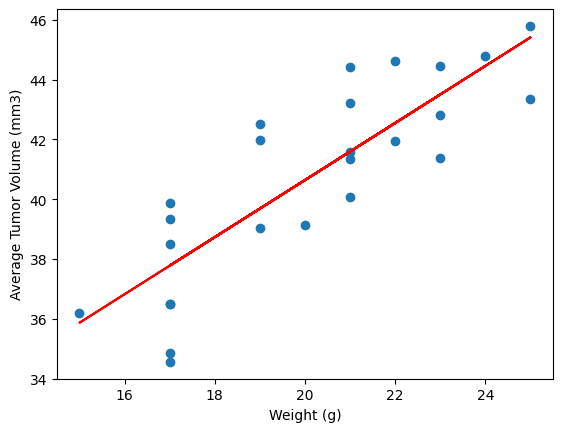

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
mouse=mouse.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse, avg_tumor)
correlation = st.pearsonr(mouse,avg_tumor)
regress_values = mouse * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse,avg_tumor)
plt.plot(mouse,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
